In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
print('Library Loaded')

Library Loaded


In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [5]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.shape

(303, 14)

In [8]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [12]:
cols = data.columns
cols

Index([&#39;age&#39;, &#39;sex&#39;, &#39;cp&#39;, &#39;trestbps&#39;, &#39;chol&#39;, &#39;fbs&#39;, &#39;restecg&#39;, &#39;thalach&#39;,
       &#39;exang&#39;, &#39;oldpeak&#39;, &#39;slope&#39;, &#39;ca&#39;, &#39;thal&#39;, &#39;target&#39;],
      dtype=&#39;object&#39;)

In [15]:
for col in cols:
    print('rows in {1} with Zero value: {0}'.format(len(data.loc[data[col] == 1 ]),col))

rows in age with Zero value: 0
rows in sex with Zero value: 207
rows in cp with Zero value: 50
rows in trestbps with Zero value: 0
rows in chol with Zero value: 0
rows in fbs with Zero value: 45
rows in restecg with Zero value: 152
rows in thalach with Zero value: 0
rows in exang with Zero value: 99
rows in oldpeak with Zero value: 14
rows in slope with Zero value: 140
rows in ca with Zero value: 65
rows in thal with Zero value: 18
rows in target with Zero value: 165


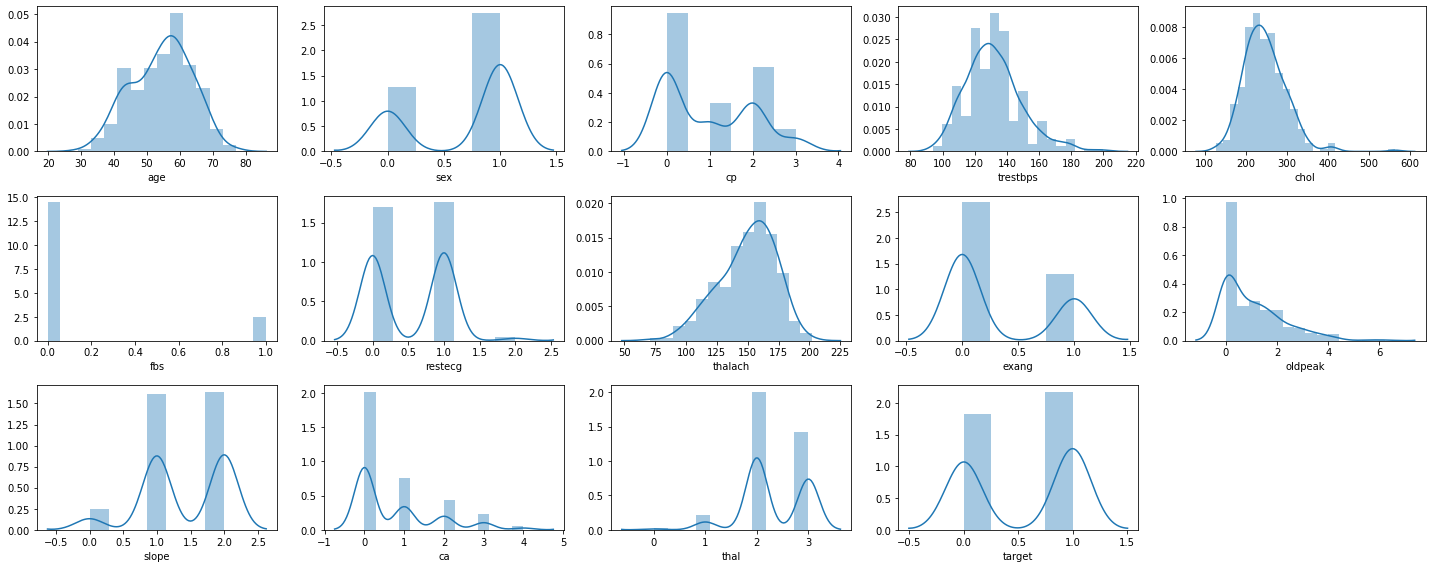

In [22]:
num_cols = data.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(3,5,col+1)
    sns.distplot(num_cols.iloc[:,col])
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9474b81b80&gt;

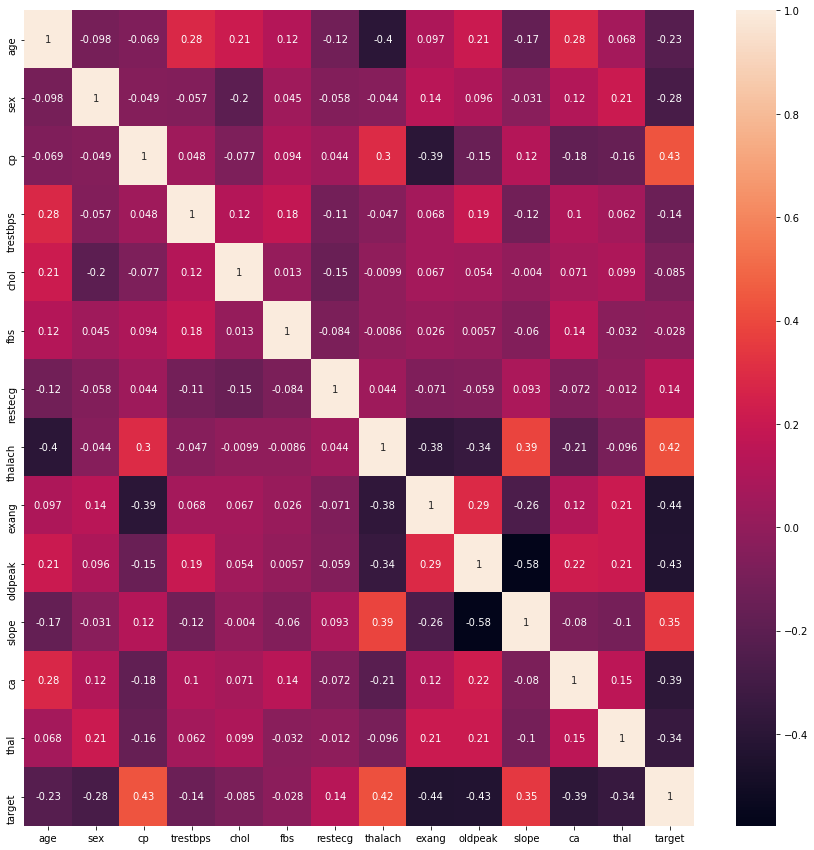

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

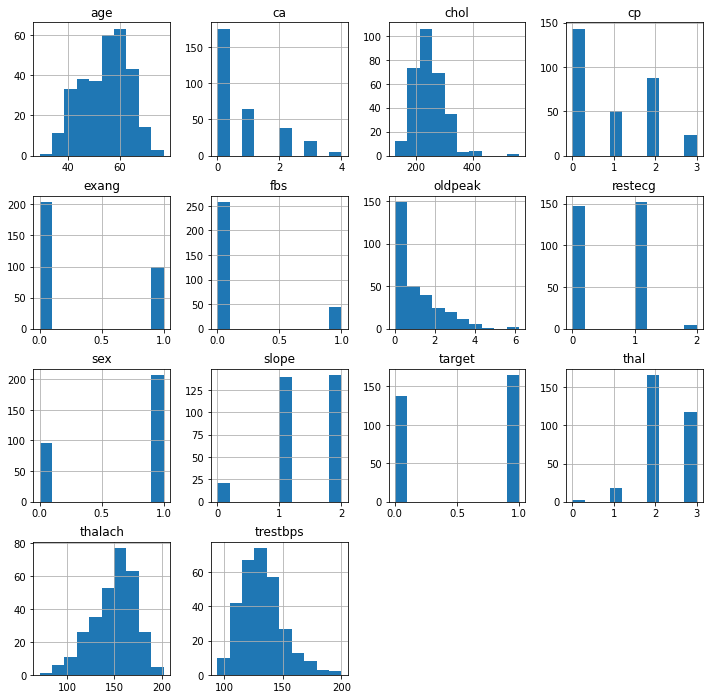

In [29]:
data.hist(figsize=(12,12))
plt.show()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9473a1fdf0&gt;

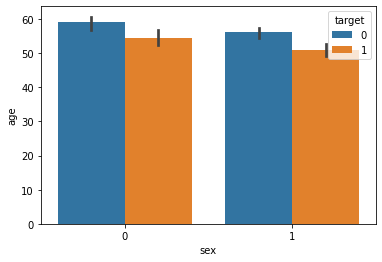

In [30]:
sns.barplot(data.sex,data.age,hue=data.target)

&lt;seaborn.axisgrid.PairGrid at 0x7f9455634040&gt;

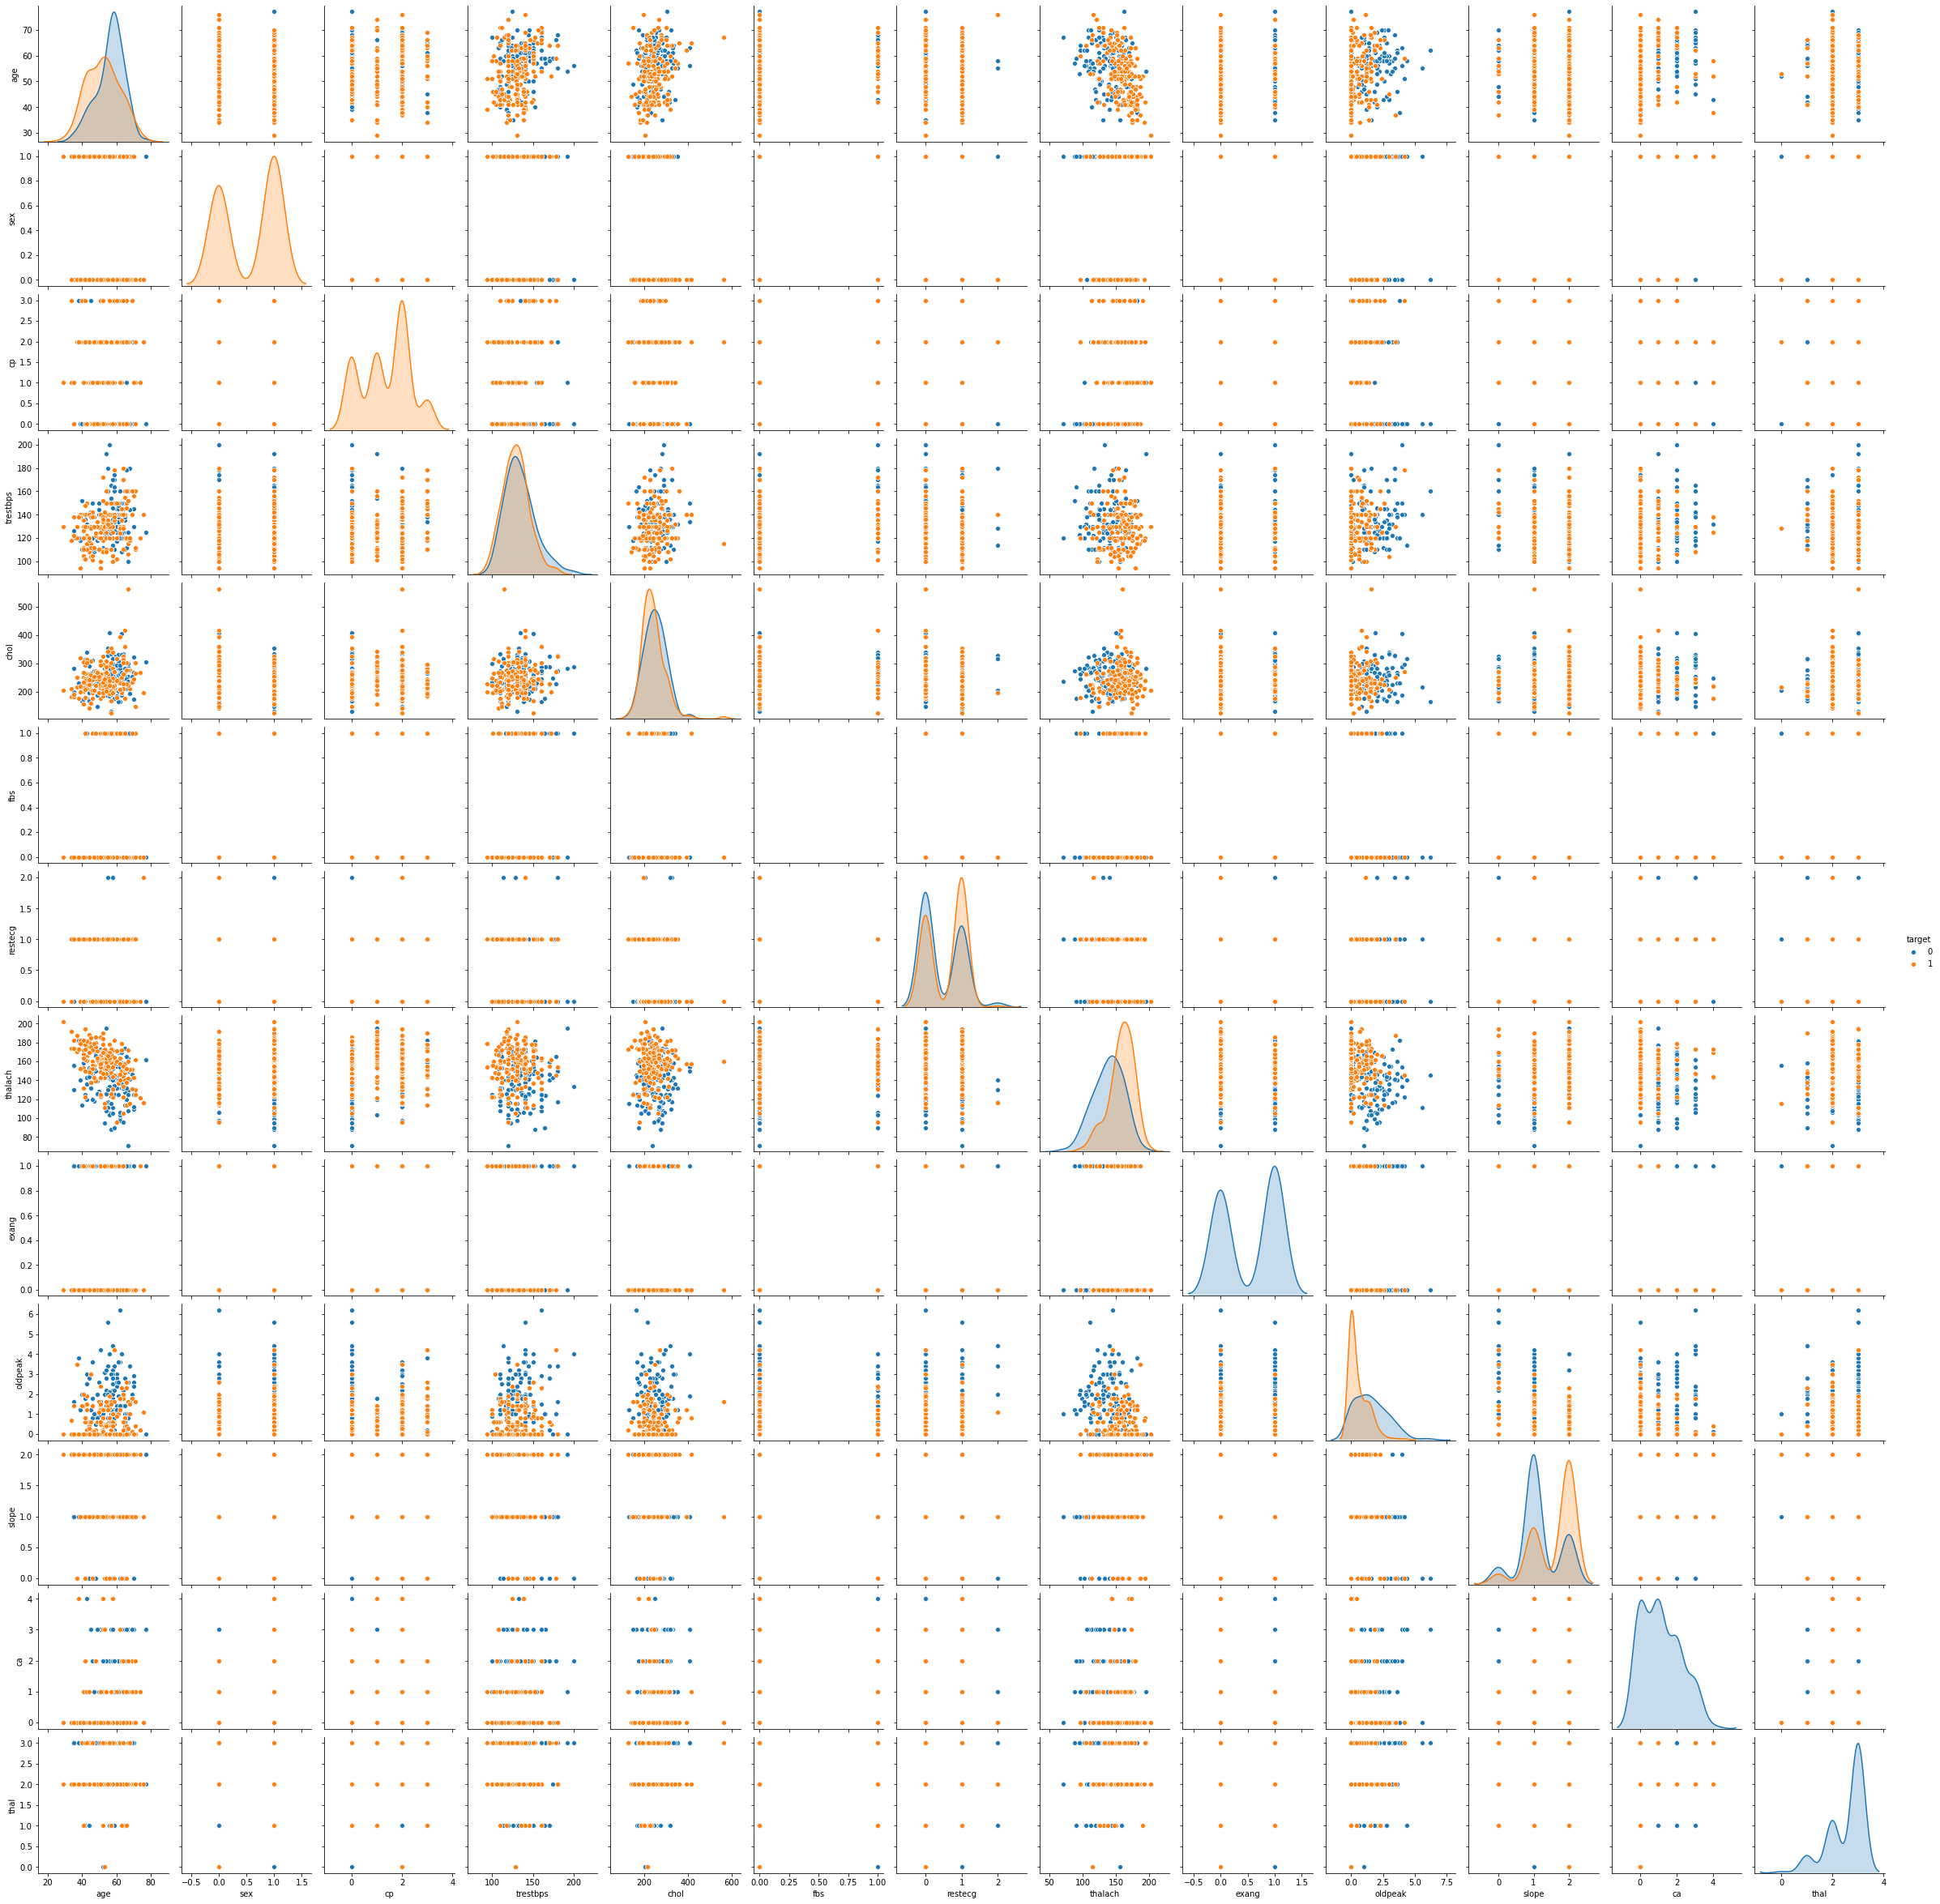

In [32]:
sns.pairplot(data,hue='target')

In [34]:
X=data.drop('target',axis=1)
from sklearn.manifold import TSNE
import time
time_start = time.time()

df_tsne = TSNE(random_state=10).fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.3000121116638184 seconds
